In [ ]:
import pandas as pd

path1 = "./data/AICamp-2023-Skin-Conditions_Dataset/test.csv"
path2 = "./data/MIT_skin-lesions-classification-dataset/test.csv"
path3 = "./data/ISIC_2019_Test_GroundTruth.csv"
path4 = "./data/Augmented_Skin_Conditions_Kaggle/test.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)

print(df1['label'].unique())
print(df2['label'].unique())
print(df3.columns[1:10].values)
print(df4['label'].unique())

['Acne or Rosacea'
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'
 'Atopic Dermatitis' 'Bullous Disease'
 'Cellulitis Impetigo and other Bacterial Infections' 'Contact Dermatitis'
 'Eczema' 'Exanthems and Drug Eruptions'
 'Hair Loss Photos Alopecia and other Hair Diseases'
 'Herpes HPV and other STDs'
 'Light Diseases and Disorders of Pigmentation'
 'Lupus and other Connective Tissue diseases'
 'Melanoma Skin Cancer Nevi and Moles'
 'Nail Fungus and other Nail Disease'
 'Psoriasis pictures Lichen Planus and related diseases'
 'Scabies Lyme Disease and other Infestations and Bites'
 'Seborrheic Keratoses and other Benign Tumors' 'Systemic Disease'
 'Tinea Ringworm Candidiasis and other Fungal Infections'
 'Urticaria Hives' 'Vascular Tumors' 'Vasculitis'
 'Warts Molluscum and other Viral Infections']
['Melanocytic nevi' 'Actinic keratoses' 'Monkeypox' 'HFMD' 'Healthy'
 'Basal cell carcinoma' 'Melanoma' 'Measles' 'Cowpox' 'Chickenpox'
 'Squamous cell carcinoma' 'Ben

In [59]:
from collections import Counter
import pandas as pd

eff_results_file="./results/0214_1112_efficientb0_results.csv"
sej_results_file="./results/0217_0816_sejin_results.csv"
sy_AIcamp_results_file="./results/0214_0912_fusion_results.csv"
sj_AIcamp_results_file="./results/0217_1448_sejin_results.csv"
SJ_AIcamp_DataAug_results_file = "./results/0217_1602_sejin_results.csv"

def mismatch(name, results_file):
    results=pd.read_csv(results_file)
    print(f"{name} results score : ", results.loc[0, 'Test Accuracy'])

    results=pd.read_csv(results_file, header=2)
    mismatch = []
    for label, pred in zip (results['true_label'], results['predicted_label']):
        if not label==pred:
            mismatch.append((label, pred))

    mismatch_counter = Counter(mismatch)
    sorted_mismatch = sorted(mismatch_counter.items(), key=lambda x: x[1], reverse=True)

    return sorted_mismatch

eff_mismatch = mismatch("EfficientNetb0", eff_results_file)
sej_mismatch = mismatch("Sejin", sej_results_file)
sy_aicamp_mismatch = mismatch("SY_AIcamp", sy_AIcamp_results_file)
sj_aicamp_mismatch = mismatch("SJ_AIcamp", sj_AIcamp_results_file)
SJ_AIcamp_DataAug_mismatch = mismatch("SJ_AIcamp_DataAug", SJ_AIcamp_DataAug_results_file)

EfficientNetb0 results score :  82.9069
Sejin results score :  85.7376
SY_AIcamp results score :  31.3343
SJ_AIcamp results score :  29.8931
SJ_AIcamp_DataAug results score :  29.2887


In [60]:
def print_mismatch(name, mismatch_data):
    print('---------------'*10)
    print()
    print(name)
    print()
    for pair, count in mismatch_data:
        print(f"{pair}: {count}")

print_mismatch("EfficientNetb0", eff_mismatch)
print_mismatch("Sejin", sej_mismatch)
print_mismatch("SY_AIcamp", sy_aicamp_mismatch)
print_mismatch("SJ_AIcamp", sj_aicamp_mismatch)
print_mismatch("SJ_AIcamp_DataAug_mismatch", SJ_AIcamp_DataAug_mismatch)

------------------------------------------------------------------------------------------------------------------------------------------------------

EfficientNetb0

('Melanoma', 'Melanocytic nevi'): 139
('Benign keratosis-like-lesions', 'Melanocytic nevi'): 57
('Melanocytic nevi', 'Melanoma'): 46
('Benign keratosis-like-lesions', 'Basal cell carcinoma'): 30
('Benign keratosis-like-lesions', 'Melanoma'): 27
('Actinic keratoses', 'Basal cell carcinoma'): 26
('Melanocytic nevi', 'Benign keratosis-like-lesions'): 24
('Benign keratosis-like-lesions', 'Actinic keratoses'): 21
('Melanocytic nevi', 'Basal cell carcinoma'): 20
('Basal cell carcinoma', 'Melanocytic nevi'): 19
('Squamous cell carcinoma', 'Basal cell carcinoma'): 19
('Melanoma', 'Basal cell carcinoma'): 18
('Monkeypox', 'Chickenpox'): 16
('Melanoma', 'Benign keratosis-like-lesions'): 15
('Melanoma', 'Actinic keratoses'): 13
('Basal cell carcinoma', 'Actinic keratoses'): 11
('Squamous cell carcinoma', 'Actinic keratoses'): 10
('

In [1]:
import os
from collections import Counter
import pandas as pd

def mismatch(name, results_file):
    results = pd.read_csv(results_file)
    print(f"{name} results score : ", results.loc[0, 'Test Accuracy'])

    results = pd.read_csv(results_file, header=2)
    mismatch = []
    for label, pred in zip(results['true_label'], results['predicted_label']):
        if label != pred:
            mismatch.append((label, pred))

    mismatch_counter = Counter(mismatch)
    sorted_mismatch = sorted(mismatch_counter.items(), key=lambda x: x[1], reverse=True)

    return sorted_mismatch

# results/representative 디렉토리 내의 모든 CSV 파일을 읽고, mismatch 결과의 상위 5개를 출력
base_dir = "./results/representative"
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            # 디렉토리 명시
            dir_name = os.path.basename(os.path.dirname(file_path))
            name = os.path.splitext(file)[0]
            sorted_mismatch = mismatch(f"{dir_name}/{name}", file_path)
            print(f"Top 5 mismatches for {dir_name}/{name}:")
            for pair, count in sorted_mismatch[:5]:
                print(f"{pair}: {count}")
            print()

AICamp/0214_0912_seungyeon_results results score :  31.3343
Top 5 mismatches for AICamp/0214_0912_seungyeon_results:
('Hair Loss Photos Alopecia and other Hair Diseases', 'Nail Fungus and other Nail Disease'): 25
('Warts Molluscum and other Viral Infections', 'Cellulitis Impetigo and other Bacterial Infections'): 24
('Herpes HPV and other STDs', 'Tinea Ringworm Candidiasis and other Fungal Infections'): 22
('Psoriasis pictures Lichen Planus and related diseases', 'Tinea Ringworm Candidiasis and other Fungal Infections'): 21
('Seborrheic Keratoses and other Benign Tumors', 'Vascular Tumors'): 21

AICamp/0218_1329_mobile_results results score :  26.0809
Top 5 mismatches for AICamp/0218_1329_mobile_results:
('Hair Loss Photos Alopecia and other Hair Diseases', 'Nail Fungus and other Nail Disease'): 29
('Nail Fungus and other Nail Disease', 'Lupus and other Connective Tissue diseases'): 22
('Seborrheic Keratoses and other Benign Tumors', 'Melanoma Skin Cancer Nevi and Moles'): 22
('Scabies

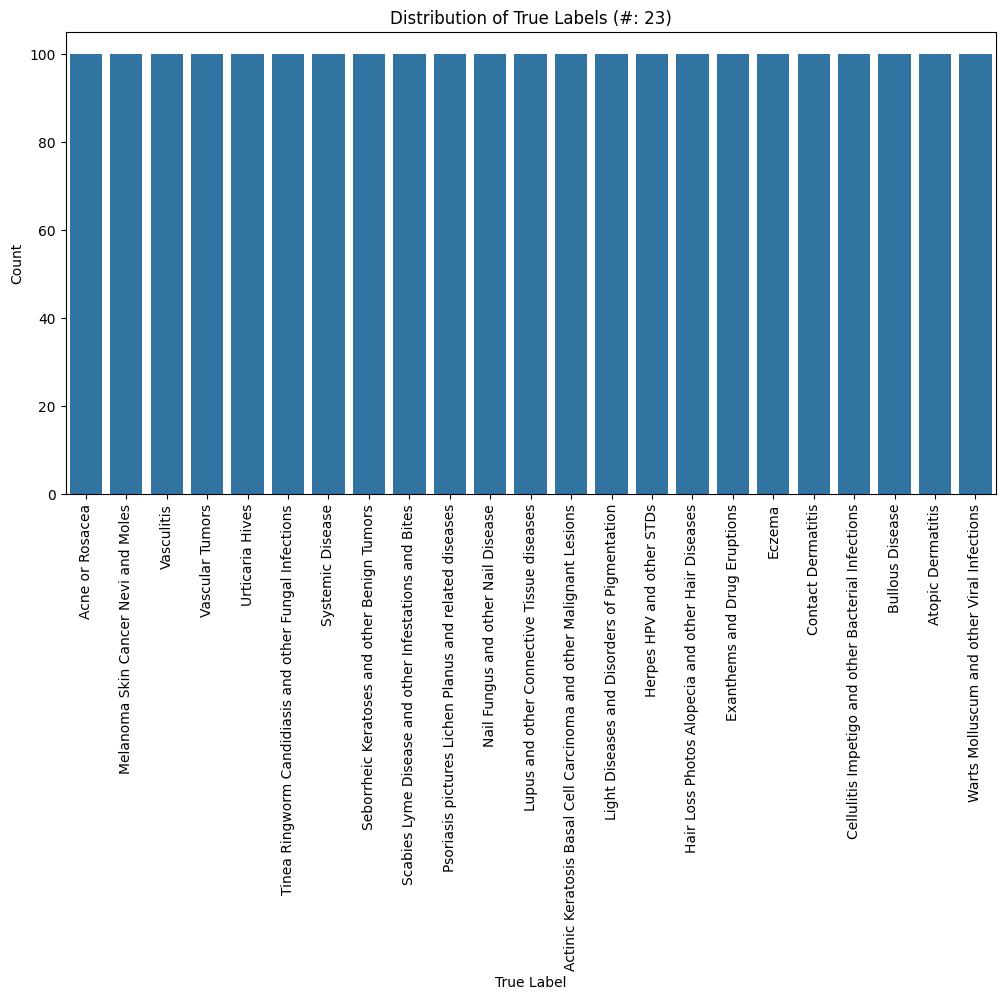

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 결과 데이터 로드
# train_df = pd.read_csv("./data/MIT_skin-lesions-classification-dataset/train.csv")
train_df = pd.read_csv("./data/AICamp-2023-Skin-Conditions_Dataset/train.csv")

# true_label에 대한 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='label', order=train_df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title(f'Distribution of True Labels (#: {train_df['label'].nunique()})')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.show()

In [57]:
len(train_df)

29322

In [69]:
import torch
from torch.serialization import safe_globals
from utils.utils import SkinDiseaseClassifier

with safe_globals([SkinDiseaseClassifier]):
    model = torch.load("./save_weights/9999_9999_sejin.pt", weights_only=False, map_location=torch.device('cpu'))
print(model)

SkinDiseaseClassifier(
  (base_model): ConvNeXt(
    (stem): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (stages): Sequential(
      (0): ConvNeXtStage(
        (downsample): Identity()
        (blocks): Sequential(
          (0): ConvNeXtBlock(
            (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
            (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
            (mlp): Mlp(
              (fc1): Linear(in_features=96, out_features=384, bias=True)
              (act): GELU()
              (drop1): Dropout(p=0.0, inplace=False)
              (norm): Identity()
              (fc2): Linear(in_features=384, out_features=96, bias=True)
              (drop2): Dropout(p=0.0, inplace=False)
            )
            (shortcut): Identity()
            (drop_path): Identity()
          )
          (1): ConvNeXtBlock(
            (